In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [4]:
l = os.listdir("./im")

In [5]:
len(l)

1

In [6]:
image = Image.open(f'./im/{l[0]}')
image = image.convert('L')
image = np.array(image)

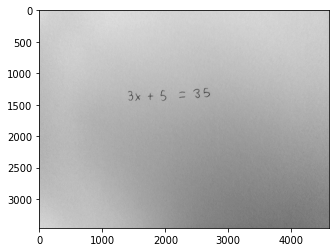

In [7]:
plt.imshow(image, cmap='gray')

In [44]:
image = image[500:2000]

In [45]:
n = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)[1]

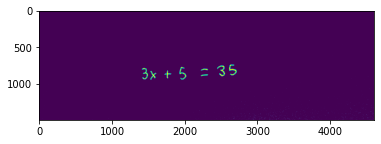

In [46]:
plt.imshow(thresh)

In [66]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
pi = []
posx = []
posy = []
size = []
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if w + h > 20:
        posx.append(x)
        posy.append(y)
        size.append([w, h])
        print(x, y, w, h)
        pi.append(n[y:y+h, x:x+w])

2226 870 97 25
1531 825 82 121
1727 818 91 108
2228 792 95 28
1416 784 82 155
1931 767 94 177
2450 748 108 149
2615 735 105 149


In [77]:
a = 0

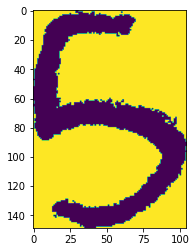

In [85]:
plt.imshow(p[a])
a +=1

In [68]:
posx = np.array(posx)
pi2 = posx.argsort()

In [70]:
pi2

array([4, 1, 2, 5, 0, 3, 6, 7])

In [72]:
pi = np.array(pi)

In [86]:
p3 = pi[pi2]

In [87]:
p = p3.copy()
for i in range(len(p)):
    if p[i].shape[0] > p[i].shape[1]:
        zero = np.full((p[i].shape[0], int((p[i].shape[0] - p[i].shape[1])/2)), 255)
        p[i] = np.concatenate((zero, p[i]), axis=1)
        p[i] = np.concatenate((p[i], zero), axis=1)
    else:
        zero = np.full((int((p[i].shape[1] - p[i].shape[0])/2), p[i].shape[1]), 255)
        p[i] = np.concatenate((zero, p[i]), axis=0)
        p[i] = np.concatenate((p[i], zero), axis=0)

In [88]:
res = []
for ps in p:
    res.append(cv2.resize(ps, dsize=(45, 45), interpolation= cv2.INTER_NEAREST))
res2 = res.copy()

In [89]:
from keras.models import load_model

Using TensorFlow backend.


In [90]:
m = load_model("third_model.h5")

In [91]:
for i in range(len(res)):
    res[i] = res[i]/255
res = np.array(res)
res = res.reshape(len(res), 45, 45, 1)

In [94]:
pred = m.predict_classes(res)

In [93]:
dic = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'plus':10, 'minus':11,
      'X':12, 'y':13, 'z':14, 'comma':15, 'pareno':16, 'parenc':17}

In [104]:
predicted = [0 for i in range(len(pred))]
for i in range(len(pred)):
    predicted[i] = list(dic.keys())[pred[i]]

In [105]:
predicted

['3', 'X', 'plus', '5', 'minus', 'minus', '3', '5']

In [106]:
dic2 = {'0':'0', '1':'1', '2':'2', '3':'3', '4':'4', '5':'5', '6':'6', '7':'7', '8':'8', '9':'9', 'plus':'+',
       'minus':'-', 'X':'x', 'y':'y', 'z':'z', 'comma':',', 'pareno':'(', 'parenc':')'}

In [118]:
a = [dic2[i] for i in predicted]

In [119]:
s = ''
for i in a:
    s += i

In [121]:
s = s.replace('--', '=')

In [122]:
s

'3x+5=35'